https://www.kaggle.com/heeraldedhia/market-basket-analysis-using-apriori-algorithm

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%load_ext rpy2.ipython

In [9]:
%%R
if(sessionInfo()['basePkgs']=="dplyr" | sessionInfo()['otherPkgs']=="dplyr"){
  detach(package:dplyr, unload=TRUE)
}

if(sessionInfo()['basePkgs']=="tm" | sessionInfo()['otherPkgs']=="tm"){
  detach(package:sentiment, unload=TRUE)
  detach(package:tm, unload=TRUE)
}

install.packages("plyr")
install.packages("arules")
install.packages("arulesViz")
library("plyr")
library("arules")
library("arulesViz")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [10]:
%%R
groceries <- read.csv("/content/drive/MyDrive/Market Basket Analysis/Groceries_dataset.csv")
class(groceries)

[1] "data.frame"


In [11]:
%%R
str(groceries)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : int  1808 2552 2300 1187 3037 4941 4501 3803 2762 4119 ...
 $ Date           : chr  "21-07-2015" "05-01-2015" "19-09-2015" "12-12-2015" ...
 $ itemDescription: chr  "tropical fruit" "whole milk" "pip fruit" "other vegetables" ...


In [12]:
%%R
head(groceries)

  Member_number       Date  itemDescription
1          1808 21-07-2015   tropical fruit
2          2552 05-01-2015       whole milk
3          2300 19-09-2015        pip fruit
4          1187 12-12-2015 other vegetables
5          3037 01-02-2015       whole milk
6          4941 14-02-2015       rolls/buns


In [13]:
%%R
sum(is.na(groceries))

[1] 0


In [14]:
%%R
sorted <- groceries[order(groceries$Member_number),]

In [15]:
%%R
sorted$Member_number <- as.numeric(sorted$Member_number)
str(sorted)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Date           : chr  "27-05-2015" "24-07-2015" "15-03-2015" "25-11-2015" ...
 $ itemDescription: chr  "soda" "canned beer" "sausage" "sausage" ...


In [16]:
%%R
itemList <- ddply(sorted, c("Member_number","Date"), function(df1)paste(df1$itemDescription,collapse = ","))
                  
head(itemList,15)

   Member_number       Date                                            V1
1           1000 15-03-2015 sausage,whole milk,semi-finished bread,yogurt
2           1000 24-06-2014                 whole milk,pastry,salty snack
3           1000 24-07-2015                   canned beer,misc. beverages
4           1000 25-11-2015                      sausage,hygiene articles
5           1000 27-05-2015                       soda,pickled vegetables
6           1001 02-05-2015                              frankfurter,curd
7           1001 07-02-2014                 sausage,whole milk,rolls/buns
8           1001 12-12-2014                               whole milk,soda
9           1001 14-04-2015                              beef,white bread
10          1001 20-01-2015           frankfurter,soda,whipped/sour cream
11          1002 09-02-2014            frozen vegetables,other vegetables
12          1002 26-04-2014                             butter,whole milk
13          1002 26-04-2015           

In [17]:
%%R
itemList$Member_number <- NULL
itemList$Date <- NULL
colnames(itemList) <- c("itemList")

In [18]:
%%R
write.csv(itemList,"ItemList.csv", quote = FALSE, row.names = TRUE)
head(itemList)

                                       itemList
1 sausage,whole milk,semi-finished bread,yogurt
2                 whole milk,pastry,salty snack
3                   canned beer,misc. beverages
4                      sausage,hygiene articles
5                       soda,pickled vegetables
6                              frankfurter,curd


In [19]:
%%R
txn = read.transactions(file="ItemList.csv", rm.duplicates= TRUE, format="basket",sep=",",cols=1);
print(txn)

distribution of transactions with duplicates:
items
  1   2   3   4 
662  39   5   1 
transactions in sparse format with
 14964 transactions (rows) and
 168 items (columns)


In [20]:
%%R
txn@itemInfo$labels <- gsub("\"","",txn@itemInfo$labels)

In [21]:
%%R
basket_rules <- apriori(txn, parameter = list(minlen=2, sup = 0.001, conf = 0.05, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.01s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [450 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [22]:
%%R
print(length(basket_rules))

[1] 450


In [23]:
%%R
summary(basket_rules)

set of 450 rules

rule length distribution (lhs + rhs):sizes
  2   3 
423  27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.06    2.00    3.00 

summary of quality measures:
    support           confidence         coverage             lift       
 Min.   :0.001002   Min.   :0.05000   Min.   :0.005346   Min.   :0.5195  
 1st Qu.:0.001270   1st Qu.:0.06397   1st Qu.:0.015972   1st Qu.:0.7673  
 Median :0.001938   Median :0.08108   Median :0.023590   Median :0.8350  
 Mean   :0.002760   Mean   :0.08759   Mean   :0.033723   Mean   :0.8859  
 3rd Qu.:0.003341   3rd Qu.:0.10482   3rd Qu.:0.043705   3rd Qu.:0.9601  
 Max.   :0.014836   Max.   :0.25581   Max.   :0.157912   Max.   :2.1831  
     count      
 Min.   : 15.0  
 1st Qu.: 19.0  
 Median : 29.0  
 Mean   : 41.3  
 3rd Qu.: 50.0  
 Max.   :222.0  

mining info:
 data ntransactions support confidence
  txn         14964   0.001       0.05


In [24]:
%%R
inspect(basket_rules[1:20])

     lhs                            rhs                support     confidence
[1]  {frozen fish}               => {whole milk}       0.001069233 0.1568627 
[2]  {seasonal products}         => {rolls/buns}       0.001002406 0.1415094 
[3]  {pot plants}                => {other vegetables} 0.001002406 0.1282051 
[4]  {pot plants}                => {whole milk}       0.001002406 0.1282051 
[5]  {pasta}                     => {whole milk}       0.001069233 0.1322314 
[6]  {pickled vegetables}        => {whole milk}       0.001002406 0.1119403 
[7]  {packaged fruit/vegetables} => {rolls/buns}       0.001202887 0.1417323 
[8]  {detergent}                 => {yogurt}           0.001069233 0.1240310 
[9]  {detergent}                 => {rolls/buns}       0.001002406 0.1162791 
[10] {detergent}                 => {whole milk}       0.001403368 0.1627907 
[11] {semi-finished bread}       => {other vegetables} 0.001002406 0.1056338 
[12] {semi-finished bread}       => {whole milk}       0.0016706

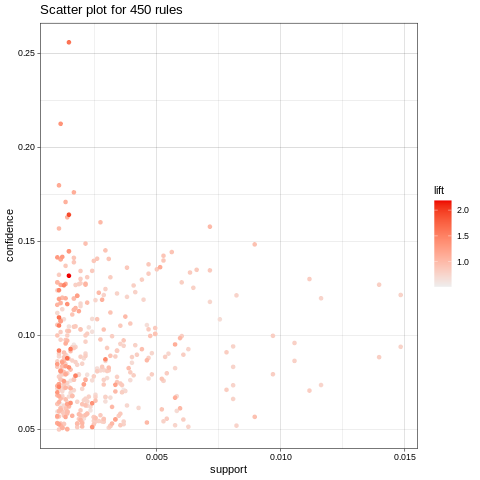

In [25]:
%%R
plot(basket_rules, jitter = 0)

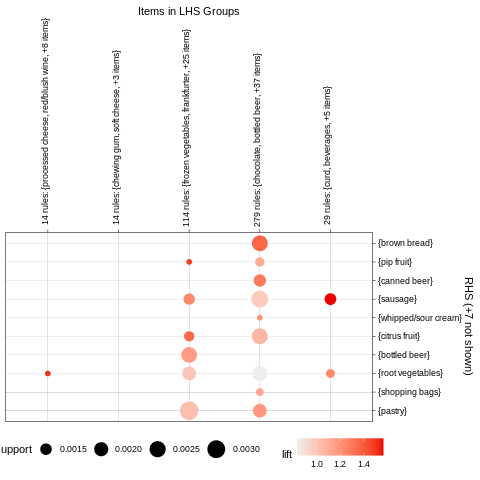

In [26]:
%%R
plot(basket_rules, method = "grouped", control = list(k = 5))

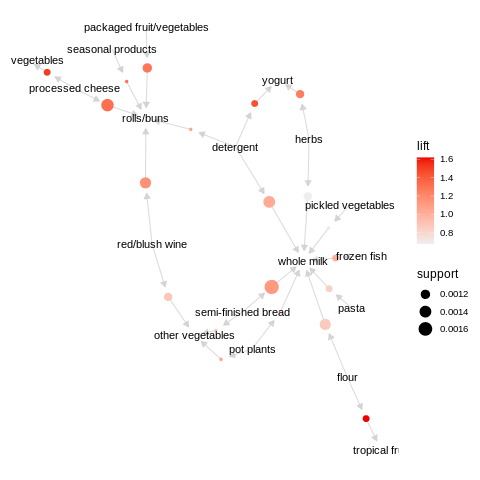

In [27]:
%%R
plot(basket_rules[1:20], method="graph")

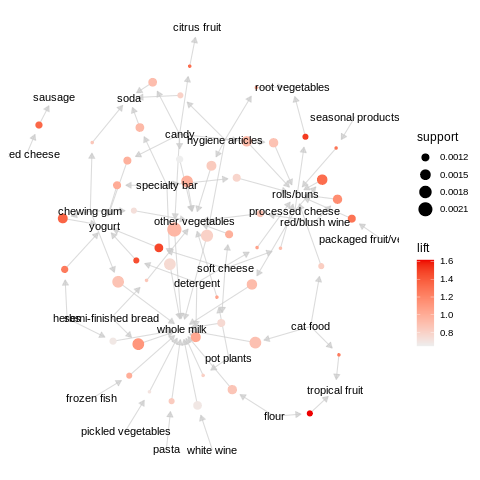

In [28]:
%%R
plot(basket_rules[1:50], method="graph")

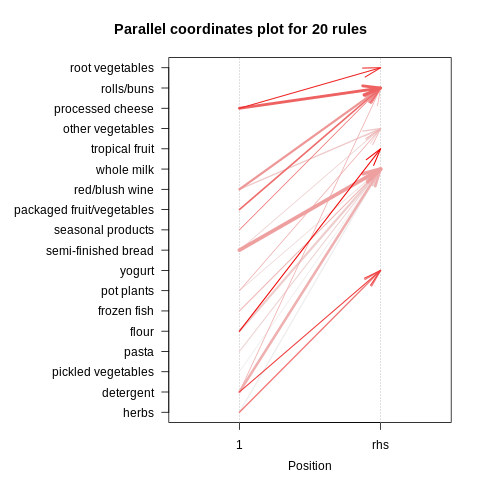

In [29]:
%%R
plot(basket_rules[1:20], method="paracoord")

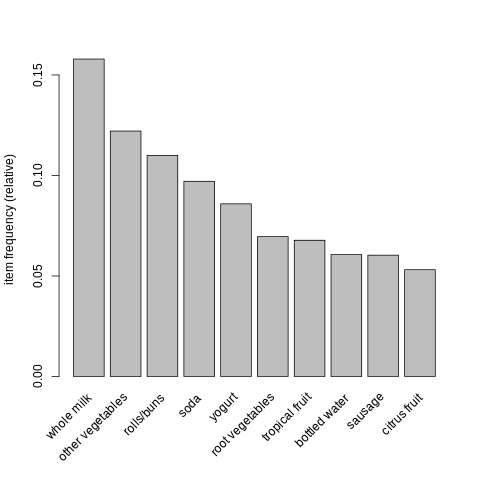

In [30]:
%%R
itemFrequencyPlot(txn, topN = 10)

In [31]:
%%R
basket_rules2 <- apriori(txn, parameter = list(minlen=3, sup = 0.001, conf = 0.1, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.02s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
%%R
print(length(basket_rules2))

[1] 17


In [33]:
%%R
summary(basket_rules2)

set of 17 rules

rule length distribution (lhs + rhs):sizes
 3 
17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001002   Min.   :0.1018   Min.   :0.005346   Min.   :0.7214  
 1st Qu.:0.001136   1st Qu.:0.1172   1st Qu.:0.008086   1st Qu.:0.8897  
 Median :0.001136   Median :0.1269   Median :0.008955   Median :1.1081  
 Mean   :0.001207   Mean   :0.1437   Mean   :0.008821   Mean   :1.1794  
 3rd Qu.:0.001337   3rd Qu.:0.1642   3rd Qu.:0.010559   3rd Qu.:1.2297  
 Max.   :0.001470   Max.   :0.2558   Max.   :0.011160   Max.   :2.1831  
     count      
 Min.   :15.00  
 1st Qu.:17.00  
 Median :17.00  
 Mean   :18.06  
 3rd Qu.:20.00  
 Max.   :22.00  

mining info:
 data ntransactions support confidence
  txn         14964   0.001        0.1


In [34]:
%%R
inspect(basket_rules2)

     lhs                              rhs                support     confidence
[1]  {sausage,yogurt}              => {whole milk}       0.001470195 0.2558140 
[2]  {sausage,whole milk}          => {yogurt}           0.001470195 0.1641791 
[3]  {whole milk,yogurt}           => {sausage}          0.001470195 0.1317365 
[4]  {sausage,soda}                => {whole milk}       0.001069233 0.1797753 
[5]  {sausage,whole milk}          => {soda}             0.001069233 0.1194030 
[6]  {rolls/buns,sausage}          => {whole milk}       0.001136060 0.2125000 
[7]  {sausage,whole milk}          => {rolls/buns}       0.001136060 0.1268657 
[8]  {rolls/buns,yogurt}           => {whole milk}       0.001336541 0.1709402 
[9]  {whole milk,yogurt}           => {rolls/buns}       0.001336541 0.1197605 
[10] {other vegetables,yogurt}     => {whole milk}       0.001136060 0.1404959 
[11] {whole milk,yogurt}           => {other vegetables} 0.001136060 0.1017964 
[12] {rolls/buns,soda}             => {o

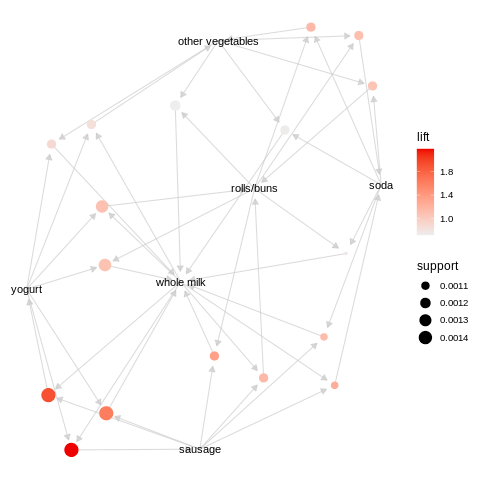

In [35]:
%%R
plot(basket_rules2, method="graph")

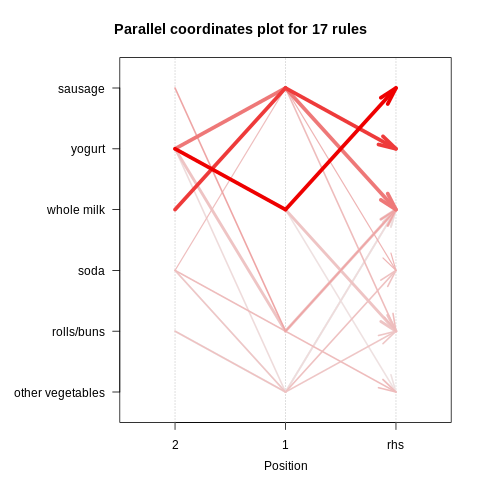

In [36]:
%%R
plot(basket_rules2, method="paracoord")